In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("/Users/rileydouglas/Downloads/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
drop_column = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df.drop(columns=drop_column, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Dropping unnessassary columns to make the process of training and testing smoother and removing these columns will streamline the dataset, focusing on the most relevant features for predicting customer churn.

In [5]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [6]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


The statistical descriptions provided above offer a comprehensive overview of the dataset's characteristics. With a total of 10,127 observations, the dataset encompasses various features relevant to customer churn prediction. The mean values provide insights into the average attributes of the customers, such as an average customer age of approximately 46.33 years. Standard deviations reveal the extent of variability within each feature, indicating moderate dispersion around the mean, as exemplified by the customer age's standard deviation of around 8.02 years. Minimum and maximum values highlight the range of values observed in the dataset, with the youngest customer being 26 years old and the oldest 73 years old. Quartiles further elucidate the distribution of data, with 25% of customers being aged 41 years or younger and 75% being aged 52 years or younger. Additionally, median values provide insights into the central tendency of the dataset, with the median customer age being 46 years, indicating a balanced distribution of ages. Overall, these statistical descriptions offer valuable insights into the dataset's composition, facilitating a deeper understanding of the characteristics relevant to customer churn prediction.

In [7]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [8]:
#saving the updated csv
df.to_csv('/Users/rileydouglas/Downloads/Research.csv', index=False)

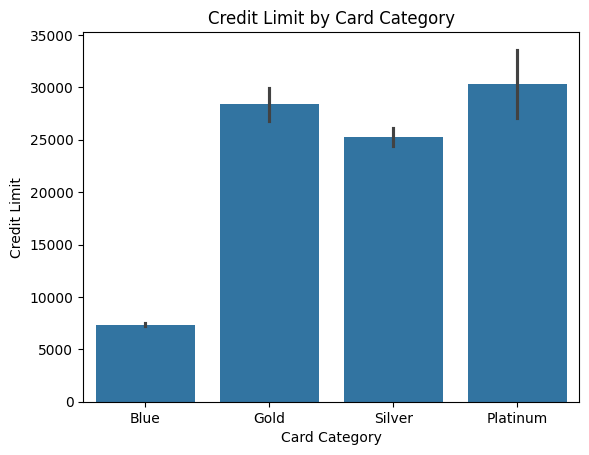

In [9]:
sns.barplot(x='Card_Category', y='Credit_Limit', data=df)
plt.title('Credit Limit by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Credit Limit')
plt.show()

In [10]:
label_encoder = LabelEncoder()
df['Attrition_Flag'] = label_encoder.fit_transform(df['Attrition_Flag'])
print(df) 

       Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0                   1            45      M                3     High School   
1                   1            49      F                5        Graduate   
2                   1            51      M                3        Graduate   
3                   1            40      F                4     High School   
4                   1            40      M                3      Uneducated   
...               ...           ...    ...              ...             ...   
10122               1            50      M                2        Graduate   
10123               0            41      M                2         Unknown   
10124               0            44      F                1     High School   
10125               0            30      M                2        Graduate   
10126               0            43      F                2        Graduate   

      Marital_Status Income_Category Card_Category 

(array([[ 898.,  228.,  141.,   95.,   56.,   34.,   28.,   22.,   20.,
          105.],
        [4313., 1296.,  790.,  494.,  351.,  265.,  224.,  139.,  108.,
          520.]]),
 array([ 1438.3 ,  4746.07,  8053.84, 11361.61, 14669.38, 17977.15,
        21284.92, 24592.69, 27900.46, 31208.23, 34516.  ]),
 <a list of 2 BarContainer objects>)

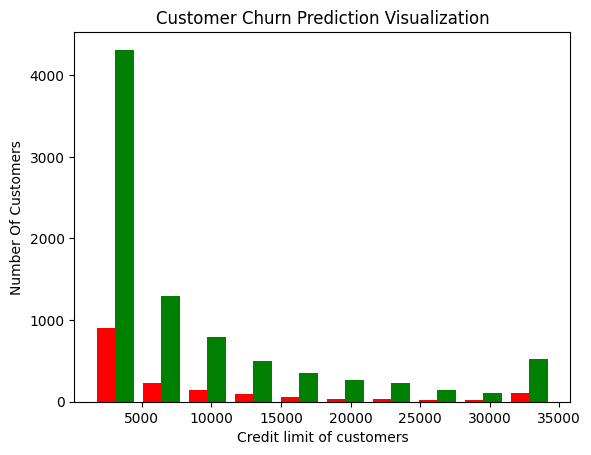

In [11]:
Existing  = df[df.Attrition_Flag == 1].Credit_Limit
attrited = df[df.Attrition_Flag == 0].Credit_Limit

plt.xlabel("Credit limit of customers")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([attrited, Existing],color=['red', 'green'])

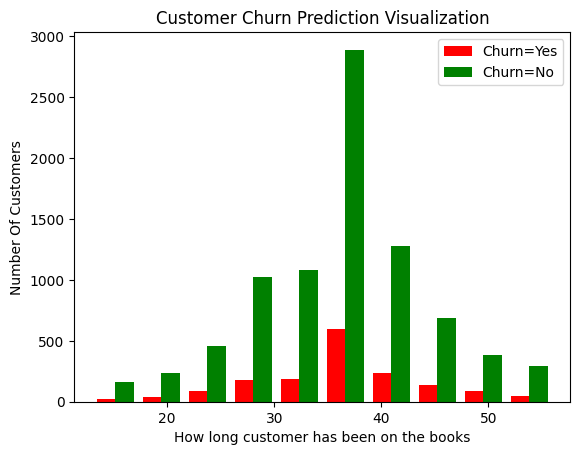

In [12]:
Existing= df[df.Attrition_Flag == 1]['Months_on_book'].values
attrited = df[df.Attrition_Flag == 0]['Months_on_book'].values

plt.xlabel("How long customer has been on the books")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([attrited, Existing],color=['red', 'green'], label=['Churn=Yes', 'Churn=No'])
plt.legend()
plt.show()


### Label Encoding and identifying unique values 

In [13]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [14]:
print_unique_col_values(df)

Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


In [15]:
#Gender column where male = 1, female = 0
df['Gender'].replace({'M':1,'F':0},inplace=True)
df.Gender.unique()

array([1, 0])

In [16]:
print(df)

       Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0                   1            45       1                3     High School   
1                   1            49       0                5        Graduate   
2                   1            51       1                3        Graduate   
3                   1            40       0                4     High School   
4                   1            40       1                3      Uneducated   
...               ...           ...     ...              ...             ...   
10122               1            50       1                2        Graduate   
10123               0            41       1                2         Unknown   
10124               0            44       0                1     High School   
10125               0            30       1                2        Graduate   
10126               0            43       0                2        Graduate   

      Marital_Status Income_Category Ca

In [17]:
#one hot encoding for categorical columns 
df1 = pd.get_dummies(data=df, columns=['Marital_Status','Income_Category','Education_Level','Card_Category'])
df1.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_C

In [18]:
df2 = df1.astype(int)
print(df2)

       Attrition_Flag  Customer_Age  Gender  Dependent_count  Months_on_book  \
0                   1            45       1                3              39   
1                   1            49       0                5              44   
2                   1            51       1                3              36   
3                   1            40       0                4              34   
4                   1            40       1                3              21   
...               ...           ...     ...              ...             ...   
10122               1            50       1                2              40   
10123               0            41       1                2              25   
10124               0            44       0                1              36   
10125               0            30       1                2              36   
10126               0            43       0                2              25   

       Total_Relationship_Count  Months

In [19]:
df2.sample(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
6850,1,43,0,3,36,5,5,3,2652,0,...,0,0,0,0,1,0,1,0,0,0
2681,1,48,1,3,40,5,2,5,34516,2317,...,0,0,0,0,1,0,0,1,0,0
4617,1,50,0,2,46,5,3,2,8708,996,...,0,0,1,0,0,0,1,0,0,0
3823,1,44,0,4,36,5,2,4,1687,1290,...,0,0,0,0,1,0,1,0,0,0
1034,1,40,0,4,36,3,1,2,3706,1043,...,0,1,0,0,0,0,1,0,0,0
6505,1,48,1,2,39,3,2,2,10033,0,...,1,0,0,0,0,0,1,0,0,0
9217,1,46,1,2,41,2,2,3,7064,1234,...,0,1,0,0,0,0,1,0,0,0
2738,1,34,1,3,21,4,1,3,4353,1655,...,0,0,1,0,0,0,1,0,0,0
2807,1,50,0,2,43,5,3,4,3424,0,...,0,1,0,0,0,0,1,0,0,0
8261,1,56,0,1,50,2,3,3,5338,0,...,0,1,0,0,0,0,1,0,0,0


In [20]:
df2.dtypes

Attrition_Flag                    int64
Customer_Age                      int64
Gender                            int64
Dependent_count                   int64
Months_on_book                    int64
Total_Relationship_Count          int64
Months_Inactive_12_mon            int64
Contacts_Count_12_mon             int64
Credit_Limit                      int64
Total_Revolving_Bal               int64
Avg_Open_To_Buy                   int64
Total_Amt_Chng_Q4_Q1              int64
Total_Trans_Amt                   int64
Total_Trans_Ct                    int64
Total_Ct_Chng_Q4_Q1               int64
Avg_Utilization_Ratio             int64
Marital_Status_Divorced           int64
Marital_Status_Married            int64
Marital_Status_Single             int64
Marital_Status_Unknown            int64
Income_Category_$120K +           int64
Income_Category_$40K - $60K       int64
Income_Category_$60K - $80K       int64
Income_Category_$80K - $120K      int64
Income_Category_Less than $40K    int64


In [21]:
#saving processed dataset
df2.to_csv('/Users/rileydouglas/Downloads/Research_final.csv', index=False)

### Train Test Split 

In [22]:
from sklearn.model_selection import train_test_split

X = df2.drop('Attrition_Flag',axis='columns')
y = df2['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [23]:
X_train.shape

(8101, 36)

In [24]:
X_test.shape

(2026, 36)

In [25]:
X_train[:10]

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
2111,45,0,2,36,6,6,3,2803,0,2803,...,0,1,0,0,0,0,1,0,0,0
1107,37,1,4,24,3,1,4,5335,2145,3190,...,0,0,1,0,0,0,1,0,0,0
8131,51,0,3,36,2,3,3,4762,0,4762,...,0,0,0,0,0,0,1,0,0,0
9821,45,0,3,36,4,3,3,3544,1661,1883,...,0,0,1,0,0,0,1,0,0,0
5409,54,0,3,36,6,1,2,4928,1805,3123,...,0,1,0,0,0,0,1,0,0,0
9023,45,1,5,40,1,2,0,29227,1151,28076,...,0,1,0,0,0,0,1,0,0,0
7569,42,0,0,31,3,3,4,2712,0,2712,...,0,0,0,0,1,0,1,0,0,0
9791,48,1,1,44,2,3,1,15355,1823,13532,...,0,0,0,0,0,0,1,0,0,0
6938,40,1,4,35,5,4,1,9974,2185,7789,...,0,1,0,0,0,0,1,0,0,0
5110,44,1,1,33,6,2,3,4969,1187,3782,...,0,0,0,0,0,1,1,0,0,0


### Implementing machine learning and deep learning 

In [26]:
len(X_train.columns)

36

In [70]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(36,), activation='relu'),
    keras.layers.Dropout(0.3),  
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=150)

Epoch 1/150
254/254 [==============================] - 1s 929us/step - loss: 75.6755 - accuracy: 0.7750
Epoch 2/150
254/254 [==============================] - 0s 900us/step - loss: 19.9084 - accuracy: 0.7771
Epoch 3/150
254/254 [==============================] - 0s 917us/step - loss: 8.1181 - accuracy: 0.7752
Epoch 4/150
254/254 [==============================] - 0s 901us/step - loss: 4.3895 - accuracy: 0.7730
Epoch 5/150
254/254 [==============================] - 0s 904us/step - loss: 2.4018 - accuracy: 0.7788
Epoch 6/150
254/254 [==============================] - 0s 913us/step - loss: 1.6002 - accuracy: 0.7901
Epoch 7/150
254/254 [==============================] - 0s 911us/step - loss: 0.9499 - accuracy: 0.7903
Epoch 8/150
254/254 [==============================] - 0s 902us/step - loss: 0.6924 - accuracy: 0.7948
Epoch 9/150
254/254 [==============================] - 0s 921us/step - loss: 0.7156 - accuracy: 0.7766
Epoch 10/150
254/254 [==============================] - 0s 909us/step -

In [71]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

64/64 [==============================] - 0s 926us/step - loss: 0.3511 - accuracy: 0.8544
Test Loss: 0.35112178325653076
Test Accuracy: 0.8543928861618042


In [40]:
#1st 10 predictions 
yp = model.predict(X_test)
yp[:10]

64/64 [==============================] - 0s 650us/step


array([[0.7986763 ],
       [0.91353697],
       [0.7827575 ],
       [0.9829262 ],
       [0.80847025],
       [0.6767636 ],
       [0.6645772 ],
       [1.        ],
       [1.        ],
       [0.9078725 ]], dtype=float32)

In [41]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_pred[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [43]:
y_test[:10]

1646    1
7880    1
7586    0
9646    1
7165    0
9884    1
2150    1
6798    1
4423    1
1977    1
Name: Attrition_Flag, dtype: int64

In [44]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.26      0.39       351
           1       0.86      0.99      0.92      1675

    accuracy                           0.86      2026
   macro avg       0.85      0.62      0.66      2026
weighted avg       0.86      0.86      0.83      2026



Text(95.72222222222221, 0.5, 'Truth')

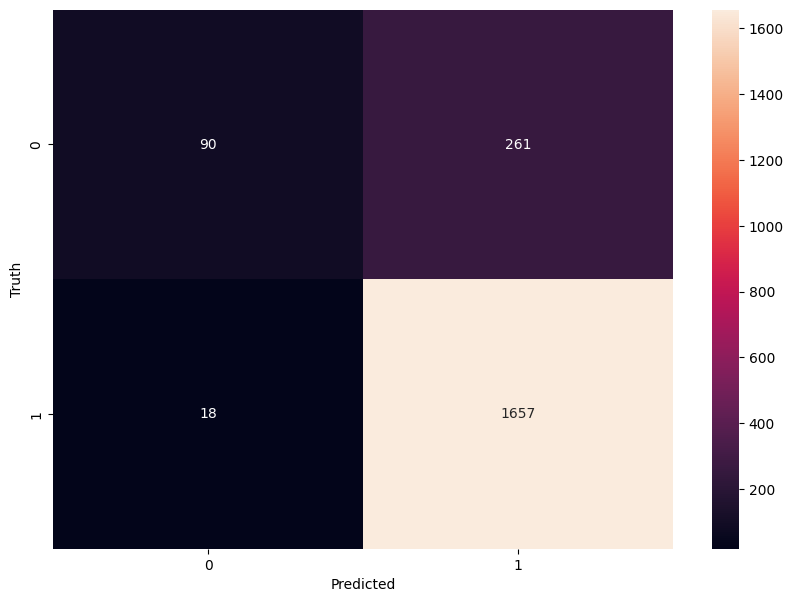

In [45]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
df2.dtypes

Attrition_Flag                    int64
Customer_Age                      int64
Gender                            int64
Dependent_count                   int64
Months_on_book                    int64
Total_Relationship_Count          int64
Months_Inactive_12_mon            int64
Contacts_Count_12_mon             int64
Credit_Limit                      int64
Total_Revolving_Bal               int64
Avg_Open_To_Buy                   int64
Total_Amt_Chng_Q4_Q1              int64
Total_Trans_Amt                   int64
Total_Trans_Ct                    int64
Total_Ct_Chng_Q4_Q1               int64
Avg_Utilization_Ratio             int64
Marital_Status_Divorced           int64
Marital_Status_Married            int64
Marital_Status_Single             int64
Marital_Status_Unknown            int64
Income_Category_$120K +           int64
Income_Category_$40K - $60K       int64
Income_Category_$60K - $80K       int64
Income_Category_$80K - $120K      int64
Income_Category_Less than $40K    int64


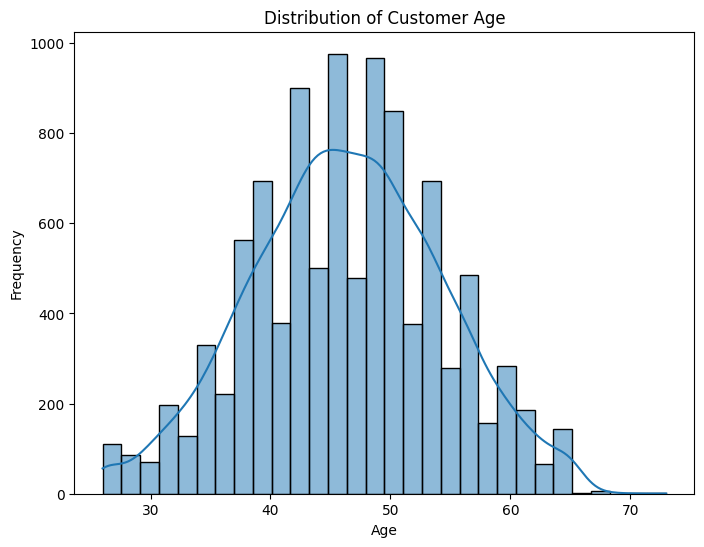

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Customer_Age', bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


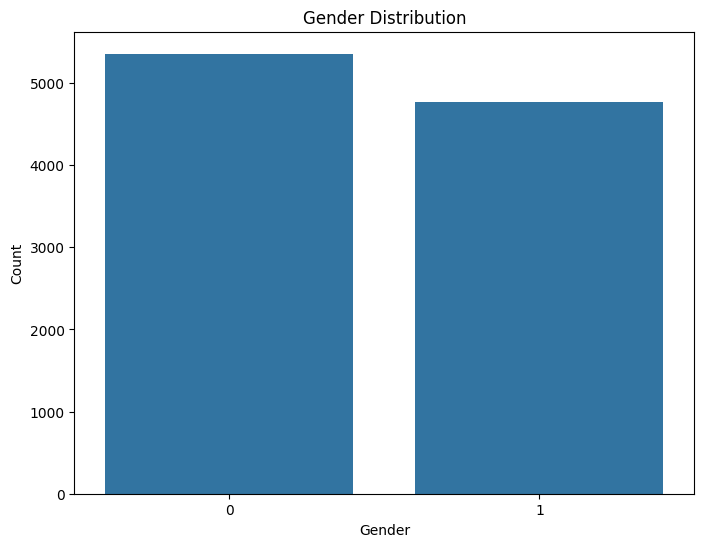

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

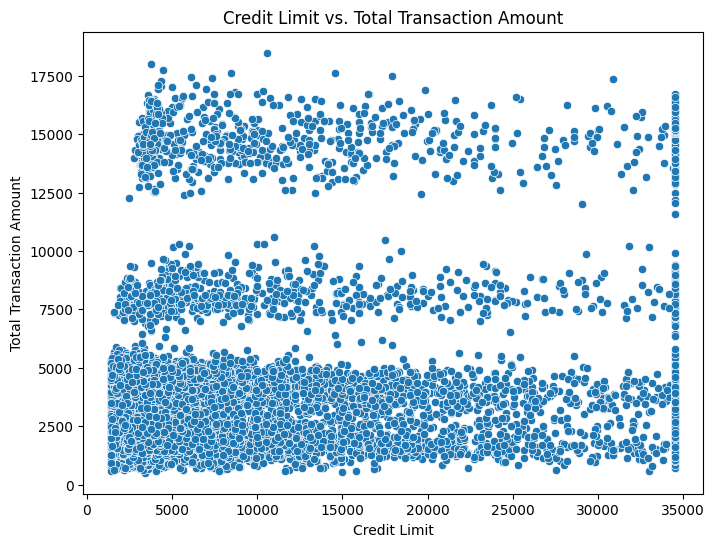

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Credit_Limit', y='Total_Trans_Amt')
plt.title('Credit Limit vs. Total Transaction Amount')
plt.xlabel('Credit Limit')
plt.ylabel('Total Transaction Amount')
plt.show()

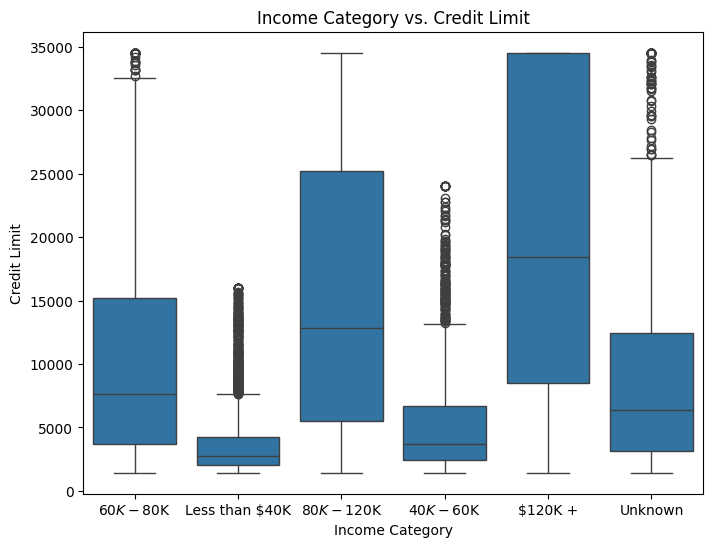

In [54]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Income_Category', y='Credit_Limit')
plt.title('Income Category vs. Credit Limit')
plt.xlabel('Income Category')
plt.ylabel('Credit Limit')
plt.show()

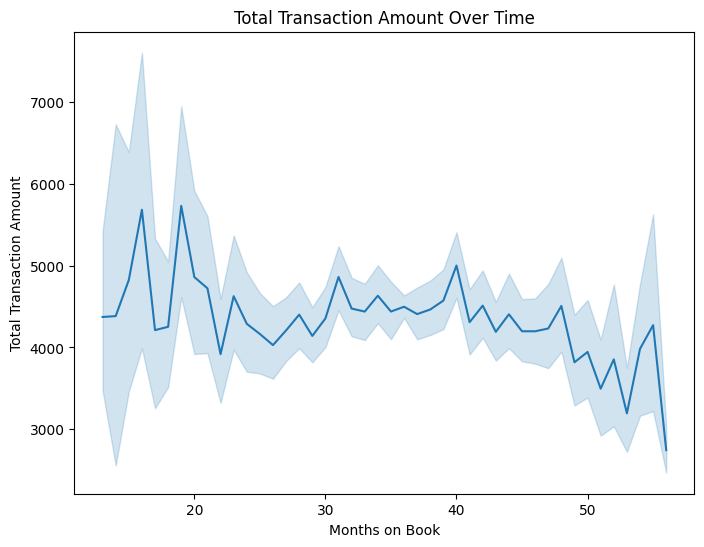

In [55]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Months_on_book', y='Total_Trans_Amt')
plt.title('Total Transaction Amount Over Time')
plt.xlabel('Months on Book')
plt.ylabel('Total Transaction Amount')
plt.show()

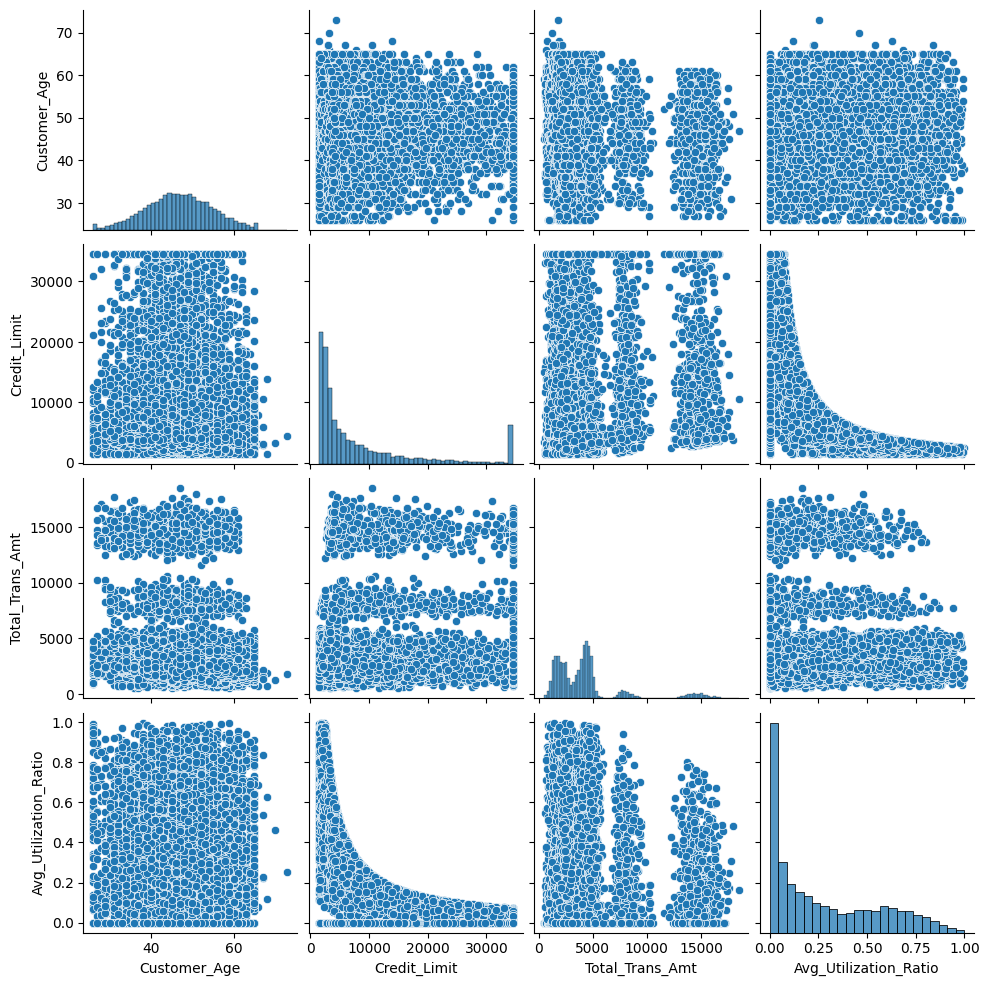

In [58]:
sns.pairplot(df[['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']])
plt.show()